Imports
========

In [120]:
import numpy as np
import random
from numpy import sin, cos, sqrt, pi, exp
from numpy.random import rand, randint, uniform
from matplotlib import pyplot as plt

Objective Functions (Test Functions)
=========================

In [121]:
def fa(var):#ackley (nD)
    #f(0)=0
    #-30<=x_j<=30 (var domain)
    obj=-20*exp(-0.2*sqrt((1/len(var))*np.sum(var**2)))-exp((1/len(var))*np.sum(cos(2*pi*var)))+20+exp(1)
    opt=[0]*len(var)+[0]
    return obj, opt

def f3(var): #nD
    #f(0)=0
    obj=np.sum(var**2)
    opt=[0]*len(var)+[0]
    return obj, opt

def f10(var): #nD
    #f(0)=0
    obj=10*len(var)+np.sum(var**2-10*cos(2*pi*var))
    opt=[0]*len(var)+[0]
    return obj, opt

def f12(var): #2D
    #f(1.897,1.006) = -0.5231
    #f(0)=0 #corrected
    obj=0.5+((sin(sqrt(var[0]**2+var[1]**2))**2-0.5)/(1+0.1*(var[0]**2+var[1]**2)))
    opt=[0]*len(var)+[0]
#     opt=[1.897,1.006,-0.5231]
    return obj, opt

Functions
========

In [122]:
def fit(pop,f):
    pop_obj=np.asarray([f(pop[i,:])[0] for i in range(pop.shape[0])])
    pop_fit=1/(pop_obj+1)
    _,opt_obj=f(pop[0,:])
    return pop_fit, opt_obj

def mutate(pop,F):
    r=np.asarray([random.sample(list(range(0,i))+list(range(i+1,pop.shape[0])),3) for i in range(pop.shape[0])])
    pop_mu=np.asarray([pop[r[i,0],:]+F*(pop[r[i,1],:]-pop[r[i,2],:]) for i in range(pop.shape[0])])
    return pop_mu
    
def xover(pop,pop_mu,pc):
    k=randint(pop.shape[1]+1,size=pop.shape[0])
    U=rand(pop.shape[0],pop.shape[1])
    pop_T=np.asarray([[pop_mu[i,j] if (U[i,j]<pc or j==k[i]) else pop[i,j] for j in range(pop.shape[1])] for i in range(pop.shape[0])])
    return pop_T

def select(pop,pop_T,f):
    fit_pop,_=fit(pop,f); fit_pop_T,_=fit(pop_T,f);
    pop_new=np.asarray([pop[i,:] if fit_pop[i]>fit_pop_T[i] else pop_T[i,:] for i in range(pop.shape[0])])
    return pop_new

Initialization of Parameters
=============

In [123]:
# np.random.seed(5) #fix only for development
n=2 #number of variables
pop_size=10*n*2 #no. of individuals >=10*n
pc=0.3 #xover probability
F=0.7 #mutation scale factor
T=500 #max no. of gens.
t=0 #gen. number
b=[-30,31] #initial pop bounds
ff=f12 #choice of the objective/test function
best_fit=[]; worst_fit=[]; mean_fit=[];

Implementation
========

In [124]:
pop=uniform(b[0],b[1],(pop_size,n));
fitness,opt_obj=fit(pop,ff); opt_fit=1/(opt_obj[-1]+1);
best_fit.append(np.max(fitness)); worst_fit.append(np.min(fitness)); mean_fit.append(np.mean(fitness));

while not(np.any(fitness==opt_fit) or t==T):
    pop_mu=mutate(pop,F) #mutation matrix
    pop_T=xover(pop,pop_mu,pc) #trial matrix
    pop=select(pop,pop_T,ff)
    fitness,_=fit(pop,ff)
    best_fit.append(np.max(fitness)); worst_fit.append(np.min(fitness)); mean_fit.append(np.mean(fitness));
    t+=1

Results
=====

In [125]:
np.set_printoptions(suppress=True)

if np.any(fitness==opt_fit):
    opt_sol=pop[np.where(fitness==opt_fit)[0][0],:]
    est_fit=opt_fit
else:
    opt_sol=pop[np.argmax(fitness),:]
    est_fit=np.max(fitness)

best_obj,_=ff(opt_sol)

print("total number of generations elapsed = ",t, '\n')

# print("final fitness vector = ", fitness,'\n')
# print("optimal fitness value = ", opt_fit,'\n')
# print("best found fitness value = ",est_fit ,'\n')

print("optimal objective function value = ", opt_obj[-1],'\n')
print("best found objective function value = ",best_obj ,'\n')

print("variables values at true optimum =",opt_obj[0:-1] ,'\n')
print("variables values at found optimum =",opt_sol ,'\n')

total number of generations elapsed =  184 

optimal objective function value =  0 

best found objective function value =  0.0 

variables values at true optimum = [0, 0] 

variables values at found optimum = [0. 0.] 



Plots
=====

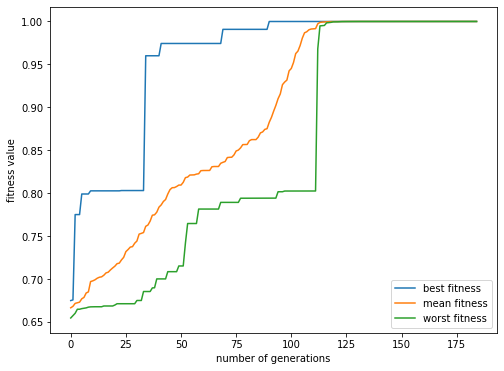

In [126]:
plt.figure(figsize=(8,6))
plt.plot(best_fit,label='best fitness')
plt.plot(mean_fit,label='mean fitness')
plt.plot(worst_fit,label='worst fitness')
plt.legend()
plt.xlabel("number of generations")
plt.ylabel("fitness value")
plt.show()

Comments/Observations:
================

1. Not only is the DE algorithm easier to code, understand, debug and apply than SGA, but also sigificantly more efficient and better performing. It is noticed that convergence to the global optimal solution happens quickly even for multimodal functions and even with multiple variables. The fitness curves are also observed to be much nicer/smoother (meaning the 'jumpy' behavior noticed in SGA dissapears here) and also that the worst, mean and best fitness converge to the same value with time/generations. DE is Awesome! :)
2. It's noticed that the algorithm usually converges to the optimal solution way before it actually stops. This is because of flating point percision issues and it is probaby a good practice to modify the termination condition to exit after an epoch of no improvements.

References:
=======
1. Lecture Slides
2. Introduction to evolutionary computing